## Observations and Insights 

1: Capomulin and Ramicane peformed the best. They had a lower mean, std and variance compared to the others as tumor sizes tended to reduce using these 2 drug regimens. s185 was on the drug regimen Copomulin and as can be seen in the line graph had a reduction in tumor size over time.

2: Infubinol had one outlier due to mouse c326 only having the drug treament up to Timepoint 5.

3: As the correlation is greater than 0.70 there is a positive linear relationship between weight and tumor size for the drug regimen Capomulin

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#viewing the mouse_metadata
#mouse_metadata.head()

In [3]:
#viewing the study_results
#study_results.head()

In [4]:
# Checking the number of mice using the count function.
study_results["Mouse ID"].count()

1893

In [5]:
#study_results["Mouse ID"].nunique()

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#use of the duplicate function
duplicate = mouse_study[mouse_study.duplicated()]

duplicate.index

Int64Index([909], dtype='int64')

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#use of drop function
mouse_study_clean = mouse_study.drop(duplicate.index)

In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean["Mouse ID"].count()

1892

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#sorts the Drug Regimen names alphabetically and then finds the unique name of the drugs used in the regimen
drug_list = mouse_study_clean["Drug Regimen"].sort_values(ascending = True).unique()

#creating seperate lists to store the drug name, mean, median, variance, std and sem which will then be combined later
drug_name = []
mean_list = []
median_list = []
variance_list = []
std_list = []
sem_list = []

#use of a for loop to go through the drug_list and then use it to filter the cleaned dataframe

for drug in drug_list:
    drug_filter = mouse_study_clean[(mouse_study_clean["Drug Regimen"] == drug)]
#calculates mean    
    mean = np.mean(drug_filter["Tumor Volume (mm3)"])
#calculates median
    median = np.median(drug_filter["Tumor Volume (mm3)"])
#calculates variance
    variance = np.var(drug_filter["Tumor Volume (mm3)"])
#calculates standard deviation
    std = np.std(drug_filter["Tumor Volume (mm3)"])
#calculates the standard error of mean    
    sem = drug_filter["Tumor Volume (mm3)"].sem()

#appends the variables calculated into the lists created above
    drug_name.append(drug)
    mean_list.append(mean)
    median_list.append(median)
    variance_list.append(variance)
    std_list.append(std)
    sem_list.append(sem)
    
#combines the now filled lists into a dataframe    
summary_df = pd.DataFrame({"Drug Regimen" : drug_name, "Mean" : mean_list, "Median" : median_list, "Variance": variance_list, "Std" : std_list, "SEM": sem_list})   


summary_df

,Drug Regimen,Mean,Median,Variance,Std,SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
4,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
6,Propriva,52.368318,50.909965,42.013852,6.481809,0.514041
7,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

#use of grouby and aggregiate function to find the required summary statistics
mouse_study_stats = mouse_study_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

#rename columns to look a bit nicer 
mouse_study_stats.columns = ["Mean", "Median", "Variance", "Std", "SEM"]

mouse_study_stats


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
#creating the dataframe for the unique number of mice per drug regimen
#groups the mouse_study_clean by Drug Regimen and finds the unique number of mice per drug regimen using the Mouse ID column
drug_reg_group = mouse_study_clean.groupby("Drug Regimen").agg({"Mouse ID" : "nunique"})
#renames column Mouse ID to count
drug_reg_group.columns = ["Count"]
#reset the index to make it look like a traditional dataframe (which isn)
drug_reg_group_final = drug_reg_group.reset_index()

Text(0.5, 1.0, 'Number of mice per Drug Regimen')

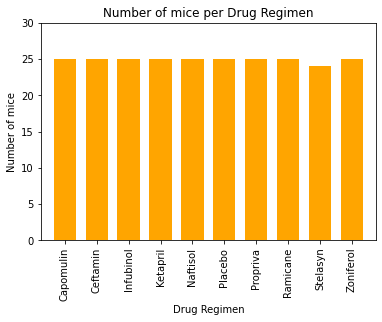

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#using pandas to plot from the drug_reg_group dataframe created above and set the width and colour
drug_reg_g_bar = drug_reg_group.plot(kind = "bar", width = 0.7, color = "orange", legend = False)
#sets the x and y limits (size)
drug_reg_g_bar.set_xlim(-0.75, 9.75)
drug_reg_g_bar.set_ylim(0, 30)
#sets the x and y label and the title
drug_reg_g_bar.set_ylabel("Number of mice")
drug_reg_g_bar.set_xlabel("Drug Regimen")
drug_reg_g_bar.set_title("Number of mice per Drug Regimen")

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

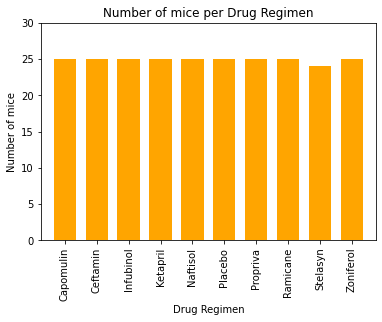

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#collects the counts from the drug_reg_group for each drug regimen
drug_regimen_count = drug_reg_group["Count"]

#collects the drug regimen names from index in the grouped data frame
drug_regimen = drug_reg_group.index

#sets the axis to be the length of the amount of names collected in drug_regimen
x_axis = np.arange(len(drug_regimen))

#determins the tick locations by finding the values within the x axis
tick_locations = [value for value in x_axis]

#sets the ticks using the tick_locations found and the names in drug_regiment
plt.xticks(tick_locations, drug_regimen, rotation = 90)

#plots the bar graph
plt.bar(x_axis, drug_regimen_count, align="center", width = 0.7, color = "orange")

#sets the title, x and labels and the x and y limits
plt.title("Number of mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 30)
plt.tight_layout

In [15]:
#creating the dataframe for the unique number of mice per gender

#groups mouse_clean study by sex and finds the unique counts with the Mouse ID column
gender_group = mouse_study_clean.groupby("Sex").agg({"Mouse ID" : "nunique"})

#renames Mouse ID column to count
gender_group.columns = ["Count"]

#reset the dataframe index
gender_group_clean = gender_group.reset_index()

(-1.1542674867807106, 1.103434680024809, -1.101678845528055, 1.10041038197642)

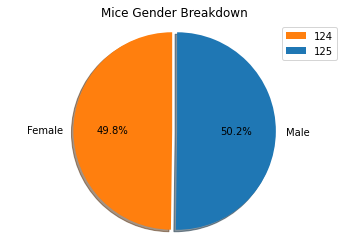

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#creates a new dataframe of mouse_study_clean grouped by sex

#sets it so one section of the pie will stand out (explode), in this case the one on the left
explode = (0.05,0)

#put colours in list to be used for setting the colours
colors = ["tab:orange", "tab:blue"]

#plots the pie chart by counting the genders, sorts it so the largest one is first and will go on the left due to the statangle

gender_group_clean_plot = gender_group["Count"].plot(kind = "pie", startangle = 90, autopct="%1.1f%%", shadow = True,
                                                                                          colors = colors, explode = explode)
#plots the title and makes the equalises the axis and removes the y label as I don't think it is needed
plt.title("Mice Gender Breakdown")
plt.legend(gender_group["Count"])
plt.axis("off")
plt.axis("equal")

(-1.1542674867807106, 1.103434680024809, -1.101678845528055, 1.10041038197642)

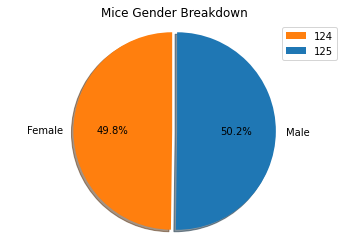

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#counts the genders 
gender_count = gender_group["Count"]

#uses the index of the gender_group to find the names for labels
labels = gender_group.index

#put colours in list to be used for setting the colours
colors = ["tab:orange", "tab:blue"]

#sets it so one section of the pie will stand out (explode), in this case the one on the left
explode = (0.05,0)

#plots the pie graph, using the labels and colors lists and sets the format of the values.
plt.pie(gender_count, labels=labels, colors = colors, explode=explode,
        autopct = "%1.1f%%", shadow=True, startangle=90)


plt.axis("equal")
plt.title("Mice Gender Breakdown")
plt.legend(gender_group["Count"])
# removes the y label as I don't think it is needed
plt.axis("off")

In [18]:
mouse_study_clean_search = mouse_study.loc[mouse_study["Mouse ID"] == "b447"]
mouse_study_clean_search

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#filters for the 4 drug regimens we are looking
drug_search  = mouse_study[(mouse_study["Drug Regimen"] == "Capomulin") | 
             (mouse_study["Drug Regimen"] == "Ramicane") |
             (mouse_study["Drug Regimen"] == "Infubinol") |                                                                                      
             (mouse_study["Drug Regimen"] == "Ceftamin" ) ]                                                                                       
               
# Start by getting the last (greatest) timepoint for each mouse
#groups by Mouse ID and finds the max value within Timepoint as this is the last timepoint for each mouse
last_timepoint = drug_search.groupby(["Mouse ID"]).agg({"Timepoint" : "max"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merges the 
tumor_final = pd.merge(drug_search, last_timepoint, on = "Mouse ID", how = "outer")

#creates a new column which minuses the last time point by the value in the original timepoint column
#this is done to the find the value that is zero which then I can filter by 0 to find the final tumor volume for each mouse
tumor_final["TimepointFinal"] = tumor_final["Timepoint_y"] - tumor_final["Timepoint_x"] 
tumor_final_df = tumor_final.loc[tumor_final["TimepointFinal"] == 0]

#displays the now filtered dataframe to verify it has the last tumor volumes
tumor_final_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint_x"]]

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint_x
9,k403,Ramicane,22.050126,45
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
49,g791,Ramicane,29.128472,45
...,...,...,...,...
773,x822,Ceftamin,61.386660,45
783,y163,Infubinol,67.685569,45
793,y769,Ceftamin,68.594745,45
803,y865,Ceftamin,64.729837,45


Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
-------------------
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
-------------------
Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
-------------------
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
-------------------
Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
-------------------
Values below 36.832904949

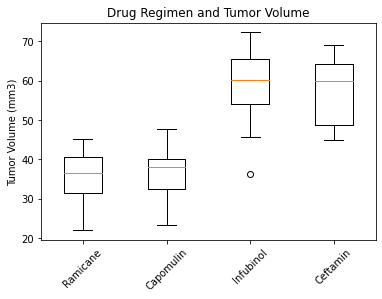

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_final_df["Drug Regimen"].unique()

treatments

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []
plot_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes

#use of for loop to use the values in treatments to filter the data and use the Tumor Volumes to determine the outliers
for x in treatments:
#uses the values in treatments to filter the list    
    d_filter = tumor_final_df[(tumor_final_df["Drug Regimen"] == x)]
#creates list from the tumor volume data
    tumor_data = d_filter["Tumor Volume (mm3)"]
#saves this into another list to be able to plot all graphs on the same plot
    plot_data.append(tumor_data)
    #print(plot_data)
#sets the quantiles
    quartiles = tumor_data.quantile([.25,.5,.75])
#finds lower quantile
    lowerq = quartiles[0.25]
#finds upper quantile
    upperq = quartiles[0.75]
#finds the interquartile range    
    iqr = upperq - lowerq
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    print(f"{x}")
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The the median of {x} is: {quartiles[0.5]} ")
    print("-------------------")
#determines the lower and upper bounds using the lower and upper quantile and iqr
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} could be outliers for {x}.")
    print(f"Values above {upper_bound} could be outliers for {x}.")    
    
#another for loop to loop through the tumor volume data and determine if any fall outside the lower and upper bounds. 
#if there is any, it will print the row from the dataframe          
    for y in tumor_data:
        if y < lower_bound:
            print(f"{y} is a lower bound outlier")       
            print(tumor_final_df.loc[tumor_final_df["Tumor Volume (mm3)"] == y]) 
           
        if y > upper_bound:
            print(f"{y} is a higher bound outlier")
            print(tumor_final_df.loc[tumor_final_df["Tumor Volume (mm3)"] == y]) 

    print("-------------------")

#plots each of the boxplots from the plot_data list created above druing the loop
fig1, ax1 = plt.subplots()
ax1.boxplot(plot_data)

#sets the x labels using the names from the treatments list
plt.xticks([1,2,3,4], treatments, rotation = 45)
#sets the title and y label
ax1.set_title("Drug Regimen and Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show(block = True)


## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint vs Tumor Volume for Mouse ID: s185')

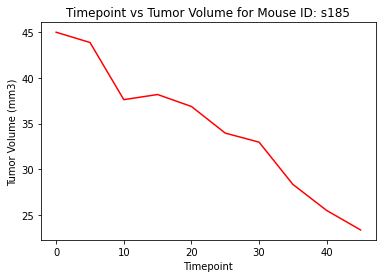

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#filters for the drug capomulin
capomulin = mouse_study_clean[(mouse_study_clean["Drug Regimen"] == "Capomulin") ]

#filters for a particlar mouse in this case s185

mouse1 = capomulin[(capomulin["Mouse ID"] == "s185") ]

#sets the y and x axis 
x_axis = mouse1["Timepoint"]
y_axis = mouse1["Tumor Volume (mm3)"]

#plots the line graph using the x and y axis designated
plt.plot(x_axis, y_axis, color = "red")

#sets the x and y label and the title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Timepoint vs Tumor Volume for Mouse ID: s185")

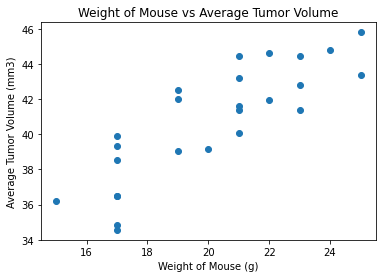

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#collects from the capomulin filter dataframe only the three columns Mouse ID, Weight and Tumor Volume
capomulin_analysis = capomulin[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

#groups the dataframe by Mouse ID and Weight and finds the mean of the weights
capomulin_analysis_group = capomulin_analysis.groupby(["Mouse ID", "Weight (g)"]).agg({"Tumor Volume (mm3)" : "mean"}).reset_index()

#renames the columns as tumor volume is now the average
capomulin_analysis_group.columns = ["Mouse ID", "Weight (g)", "Average Tumor Volume (mm3)"]

#sets the x and y values, in this case x is the weight and y is the average tumor volume
x_values = capomulin_analysis_group["Weight (g)"]
y_values = capomulin_analysis_group["Average Tumor Volume (mm3)"]

#plots the scatter plot
plt.scatter(x_values, y_values)

#sets the x and y label and title
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight of Mouse vs Average Tumor Volume")
plt.show()


## Correlation and Regression

The correlation between Weight (g) and Average Tumor Volume (mm3) is 0.84


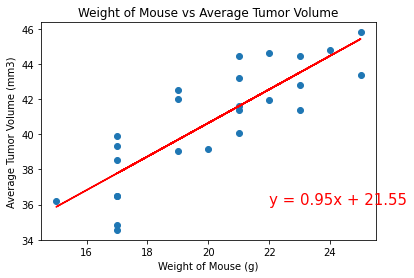

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#sets the x and y values, in this case x is the weight and y is the average tumor volume
x_values = capomulin_analysis_group["Weight (g)"]
y_values = capomulin_analysis_group["Average Tumor Volume (mm3)"]

#calculates the correlation coefficient
correlation = st.pearsonr(x_values,y_values)
#displays the correlation coefficient
print(f"The correlation between Weight (g) and Average Tumor Volume (mm3) is {round(correlation[0],2)}")

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values, y_values)

#plots the linear regression line
plt.plot(x_values, regress_values, "r-")

#plots the linear equation
plt.annotate(line_equation, (22, 36), fontsize=15, color="red")

#plots the x and y labels and the title
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight of Mouse vs Average Tumor Volume")
plt.show()
